In [84]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# Use ridge regression with different lambdas and poly degrees to make the predictions

In [83]:
from proj1_helpers import *
from helpers import *
from implementations import *

In [36]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [86]:
from plots import cross_validation_visualization_poly
from build_polynomial import *

def cross_validation_demo():
    seed = 1
    degrees = np.array([2,4,6,7,9])
    k_fold = 4
    #lambdas = np.logspace(-2, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    for degree in degrees:
        print(degree)
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,w = cross_validation(y, tx, k_indices, k, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))

    cross_validation_visualization_poly(degrees, rmse_tr, rmse_te,degree)

In [61]:
def cross_validation(y, x, k_indices, k, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
    # form data with polynomial degree
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    # ridge regression
    w = least_squares(y_tr, tx_tr)
    # calculate the loss for train and test data
    loss_tr = np.sqrt(2 * compute_loss(y_tr, tx_tr, w))
    loss_te = np.sqrt(2 * compute_loss(y_te, tx_te, w))
    return loss_tr, loss_te,w

In [39]:
y_data,x_data,ind=load_csv_data('data/train.csv/train.csv')

In [40]:

#X=x_data[:,[1,2,3,7,8,9,10,11]] #raw data
#X=x_data[:,13:22] # computed data
#X=x_data[:,[1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22]] # computed data
#X=x_data[:,[1,2,3,7,8,9,10,13,14,16,17,19,21,22,29]] # without phi
#X=x_data[:,[1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,29]] # wihtout -999
X=x_data[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29]] # without 11 and 18
#X=x_data

y_samp, x_samp = sample_data(y_data, X, 1, size_samples=20000)
#y_samp =y_data
#x_samp = X
#x_samp, mean_x, std_x = standardize(x_samp)
x_samp, mean_x, std_x=standardizeNan(x_samp)
tx = np.c_[np.ones((y_samp.shape[0], 1)), x_samp]
initial_w = np.zeros((tx.shape[1], 1))

y = np.expand_dims(y_samp, axis=1)
print(tx.shape)
print(y.shape)
print(initial_w.shape)
print(X[:,22])



(20000, 29)
(20000, 1)
(29, 1)
[  2.15000000e+00   7.25000000e-01   2.05300000e+00 ...,   1.80000000e+00
  -9.99000000e+02  -9.99000000e+02]


2
4
6
7
9


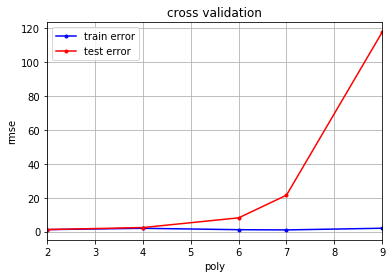

In [92]:
cross_validation_demo()


In [52]:
polyN = 2
tx_tr = build_poly(tx, polyN) # full set 250K all data features with preprocessing
w=least_squares(y, tx_tr)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 1.8125]]


In [53]:
polyN = 3
tx_tr = build_poly(tx, polyN) # full set 250K all data features with preprocessing
w=least_squares(y, tx_tr)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 2.22637775]]


In [54]:
polyN = 4
tx_tr = build_poly(tx, polyN) # full set 250K all data features with preprocessing
w=least_squares(y, tx_tr)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.18622532]]


In [58]:
polyN = 6
tx_tr = build_poly(tx, polyN) # full set 250K all data features with preprocessing
w=least_squares(y, tx_tr)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.18378573]]


In [59]:
polyN = 8
tx_tr = build_poly(tx, polyN) # full set 250K all data features with preprocessing
w=least_squares(y, tx_tr)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.1716764]]
